```
# Copyright 2022 by the author(s) of CHI2023 Full Paper "Short-Form
# Videos Degrade Our Capacity to Retain Intentions: Effect of Context
# Switching On Prospective Memory". All rights reserved.
#
# Use of this source code is governed by a GPLv3 license that
# can be found in the LICENSE file.
```

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'''\usepackage{libertine}\usepackage{fontawesome5}\usepackage{xcolor}'''
plt.rcParams['ps.usedistiller'] = 'xpdf'
sns.set_theme(style='ticks')


colors = sns.color_palette('vlag', as_cmap=False, n_colors=10)
c1 = colors[0]
c2 = colors[-1]

# PM

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

tiktok_pre vs. tiktok_post: Custom statistical test, P_val:4.975e-04
youtube_post vs. tiktok_post: Custom statistical test, P_val:1.407e-02
twitter_post vs. tiktok_post: Custom statistical test, P_val:2.871e-04
rest_post vs. tiktok_post: Custom statistical test, P_val:1.719e-03
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

twitter_pre vs. twitter_post: Custom statistical test, P_val:4.435e-02
youtube_post vs. tiktok_post: Custom statistical test, P_val:1.358e-02
twitter_post vs. tiktok_post: Custom statistical test, P_val:2.397e-03
rest_post vs. tiktok_post: Custom statistical test, P_val:8.549e-03
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5

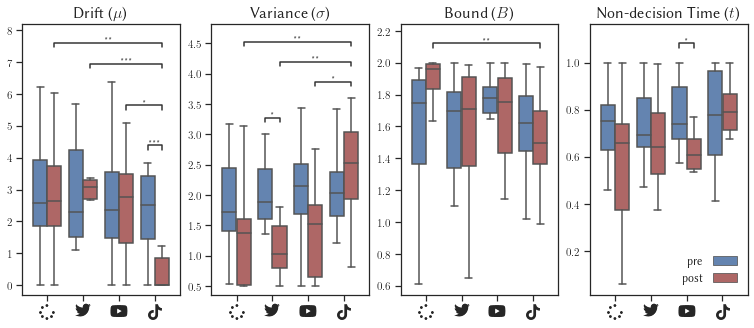

In [2]:
df_feature = pd.read_csv('data/ddm.csv')
fig, axes = plt.subplots(1, 4, figsize=(13, 5))
interrupts = ['rest', 'twitter', 'youtube', 'tiktok']
measures = ['pre', 'post']
features = ['drift', 'noise', 'bound', 'nondectime']
features_label = ['Drift ($\mu$)', 'Variance ($\sigma$)', 'Bound ($B$)', 'Non-decision Time ($t$)']
icons = ['\\faSpinner', '\\faTwitter', '\\faYoutube', '\\faTiktok']
labels = ['Rest', 'Twitter', 'Youtube', 'Tiktok']
sns.boxplot(ax=axes[0], x='interrupt', y=features[0], order=interrupts, hue='measure', hue_order=measures, data=df_feature[(df_feature.task == 'PM')], palette=[c1, c2], showfliers = False)
sns.boxplot(ax=axes[1], x='interrupt', y=features[1], order=interrupts, hue='measure', hue_order=measures, data=df_feature[(df_feature.task == 'PM')], palette=[c1, c2], showfliers = False)
sns.boxplot(ax=axes[2], x='interrupt', y=features[2], order=interrupts, hue='measure', hue_order=measures, data=df_feature[(df_feature.task == 'PM')], palette=[c1, c2], showfliers = False)
sns.boxplot(ax=axes[3], x='interrupt', y=features[3], order=interrupts, hue='measure', hue_order=measures, data=df_feature[(df_feature.task == 'PM')], palette=[c1, c2], showfliers = False)
for i in range(0, 4):
    axes[i].set_xticklabels(icons, fontsize=16)
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)
    axes[i].set_title(features_label[i % 4], fontsize=16)
    if i != 3:
        g = axes[i].get_legend().remove()
    else:
        g = axes[i].legend(markerfirst=False, fontsize=12, loc='lower right')
        g.set_title(None)
        g.set_frame_on(False)

from statannotations.Annotator import Annotator
pairs = [
    (('tiktok', 'pre'), ('tiktok', 'post')),
    (('tiktok', 'post'), ('rest', 'post')),
    (('tiktok', 'post'), ('twitter', 'post')),
    (('tiktok', 'post'), ('youtube', 'post')),
]
annot = Annotator(axes[0], pairs, data=df_feature[(df_feature.task == 'PM')], x='interrupt', y=features[0], order=interrupts, hue='measure', hue_order=['pre', 'post'])
annot.configure(test=None, loc='inside')
annot.set_pvalues([.0004975439, .0017185539, .0002871479, .0140690162])
annot.annotate()

pairs = [
    (('twitter', 'pre'), ('twitter', 'post')),
    (('tiktok', 'post'), ('rest', 'post')),
    (('tiktok', 'post'), ('twitter', 'post')),
    (('tiktok', 'post'), ('youtube', 'post')),
]
annot = Annotator(axes[1], pairs, data=df_feature[(df_feature.task == 'PM')], x='interrupt', y=features[1], order=interrupts, hue='measure', hue_order=['pre', 'post'])
annot.configure(test=None, loc='inside')
annot.set_pvalues([0.044351243, 0.008548603, 0.002397299, 0.013580022])
annot.annotate()


pairs = [
    (('tiktok', 'post'), ('rest', 'post')),
]
annot = Annotator(axes[2], pairs, data=df_feature[(df_feature.task == 'PM')], x='interrupt', y=features[2], order=interrupts, hue='measure', hue_order=['pre', 'post'])
annot.configure(test=None, loc='inside')
annot.set_pvalues([0.001917398])
annot.annotate()


pairs = [
    (('youtube', 'pre'), ('youtube', 'post')),
]
annot = Annotator(axes[3], pairs, data=df_feature[(df_feature.task == 'PM')], x='interrupt', y=features[3], order=interrupts, hue='measure', hue_order=['pre', 'post'])
annot.configure(test=None, loc='inside')
annot.set_pvalues([0.02683226])
annot.annotate()

plt.savefig('figures/fig5_ddm_pm.pdf', bbox_inches='tight',)

# LD

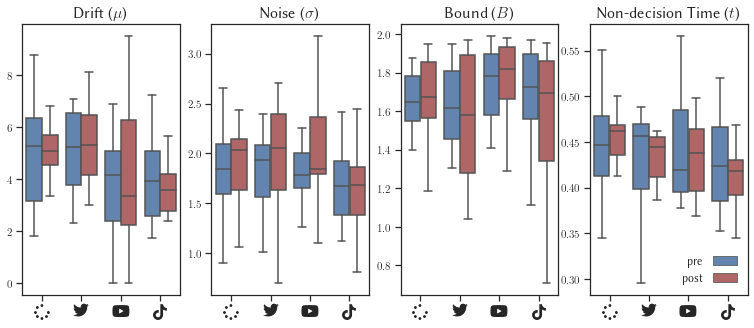

In [3]:
df_feature = pd.read_csv('data/ddm.csv')
fig, axes = plt.subplots(1, 4, figsize=(13, 5))
interrupts = ['rest', 'twitter', 'youtube', 'tiktok']
measures = ['pre', 'post']
features = ['drift', 'noise', 'bound', 'nondectime']
features_label = ['Drift ($\mu$)', 'Noise ($\sigma$)', 'Bound ($B$)', 'Non-decision Time ($t$)']
icons = ['\\faSpinner', '\\faTwitter', '\\faYoutube', '\\faTiktok']
labels = ['Rest', 'Twitter', 'Youtube', 'Tiktok']
sns.boxplot(ax=axes[0], x='interrupt', y=features[0], order=interrupts, hue='measure', hue_order=measures, data=df_feature[(df_feature.task == 'LD')], palette=[c1, c2], showfliers = False)
sns.boxplot(ax=axes[1], x='interrupt', y=features[1], order=interrupts, hue='measure', hue_order=measures, data=df_feature[(df_feature.task == 'LD')], palette=[c1, c2], showfliers = False)
sns.boxplot(ax=axes[2], x='interrupt', y=features[2], order=interrupts, hue='measure', hue_order=measures, data=df_feature[(df_feature.task == 'LD')], palette=[c1, c2], showfliers = False)
sns.boxplot(ax=axes[3], x='interrupt', y=features[3], order=interrupts, hue='measure', hue_order=measures, data=df_feature[(df_feature.task == 'LD')], palette=[c1, c2], showfliers = False)
for i in range(0, 4):
    axes[i].set_xticklabels(icons, fontsize=16)
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)
    axes[i].set_title(features_label[i % 4], fontsize=16)
    if i != 3:
        g = axes[i].get_legend().remove()
    else:
        g = axes[i].legend(markerfirst=False, fontsize=12, loc='lower right')
        g.set_title(None)
        g.set_frame_on(False)